# Sample Visualization

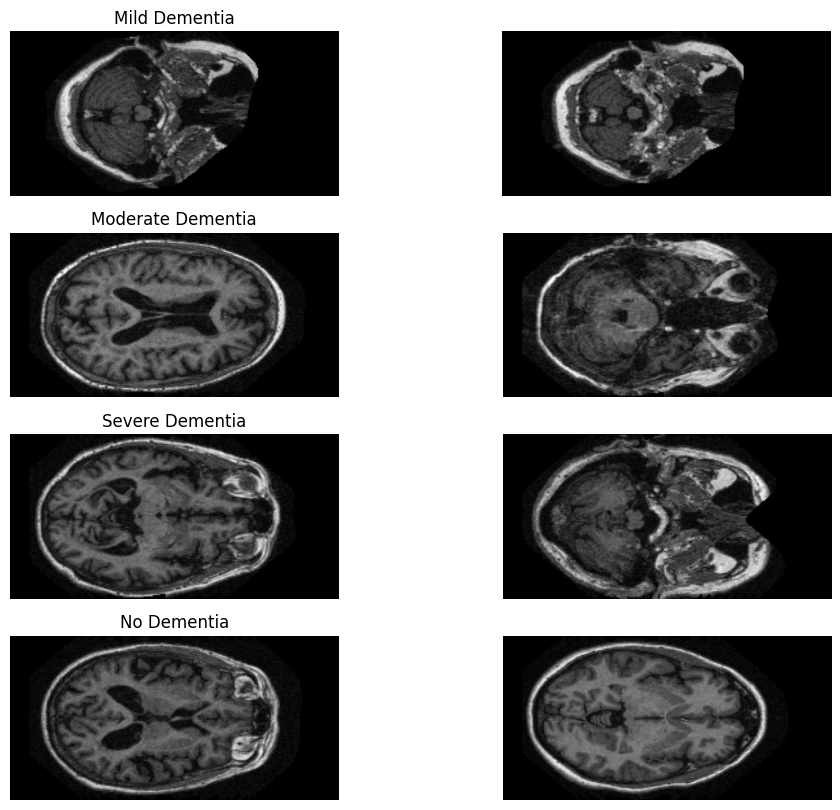

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = '/content/drive/MyDrive/Dataset/MRI Images'
num_samples = 2

plt.figure(figsize=(10, 10))

for i, class_name in enumerate(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        random_samples = random.sample(image_files, min(num_samples, len(image_files)))

        for j, img_name in enumerate(random_samples):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path)
                plt.subplot(len(os.listdir(dataset_dir)), num_samples, i * num_samples + j + 1)
                plt.imshow(img)
                plt.axis('off')
                if j == 0:
                    plt.title(class_name)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

plt.tight_layout()
plt.show()


# Class Distribution Analysis

* It will count the number of images in each class and visualize the distribution using a bar chart

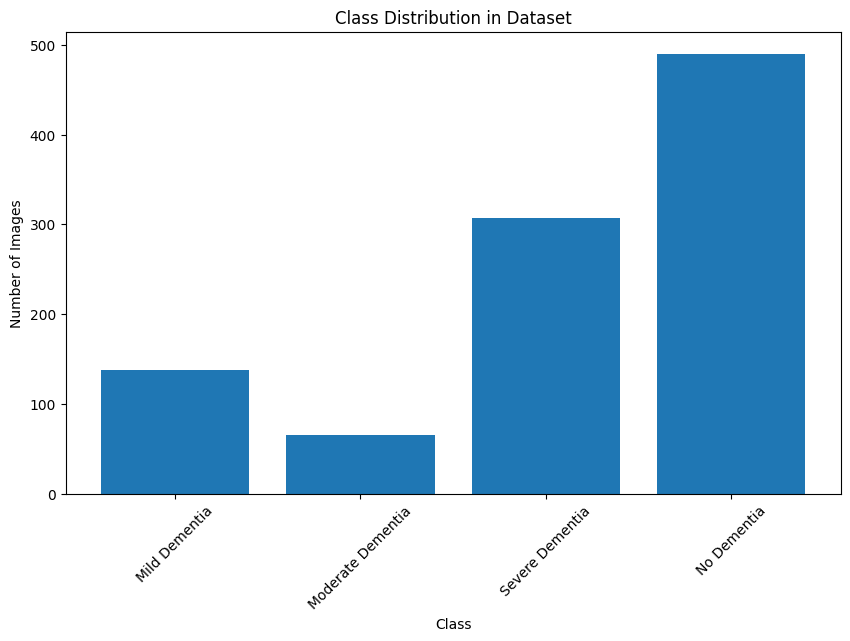

In [ ]:
import os
import matplotlib.pyplot as plt

dataset_dir = '/content/drive/MyDrive/Dataset/MRI Images'
class_counts = {}

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()


# Image Size Distribution

Error processing /content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg'


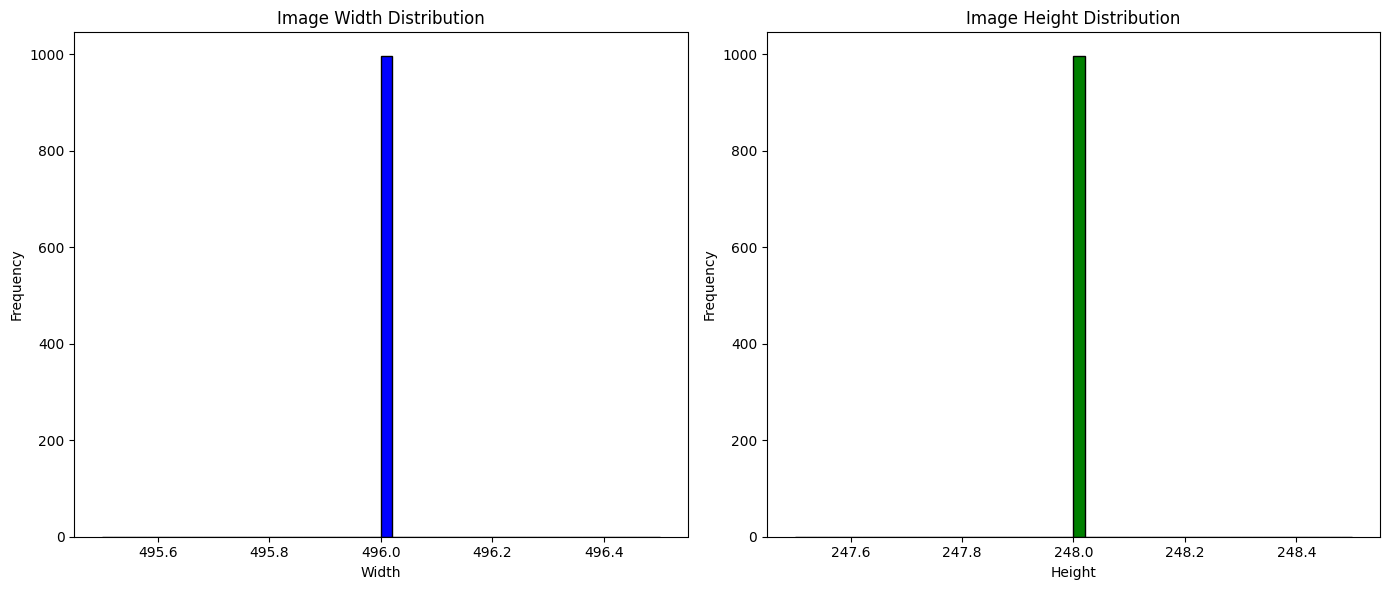

In [ ]:
widths = []
heights = []

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue
            try:
                with Image.open(img_path) as img:
                    widths.append(img.width)
                    heights.append(img.height)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='blue', edgecolor='black')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='green', edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()

Error processing /content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg'


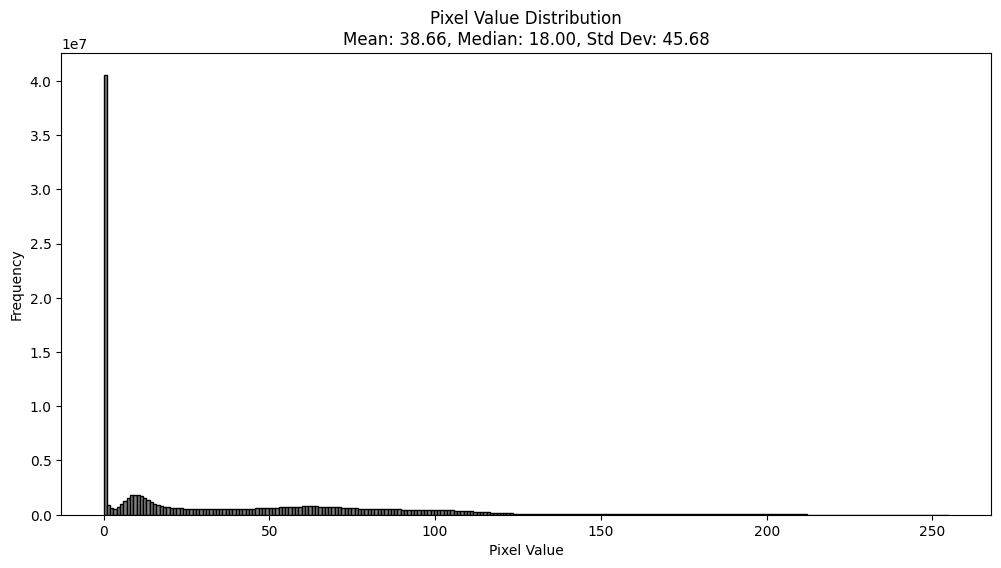

In [ ]:
warnings.filterwarnings('ignore', category=UserWarning, module='PIL')
class NullWriter:
    def write(self, *args, **kwargs):
        pass
    def flush(self):
        pass

sys.stderr = NullWriter()

dataset_dir = '/content/drive/MyDrive/Dataset/MRI Images'

pixel_values = []

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    with Image.open(img_path) as img:
                        img = img.convert('L')
                        pixel_values.extend(np.array(img).flatten())
                except (IOError, SyntaxError) as e:
                    print(f"Error processing {img_path}: {e}")

pixel_values = np.array(pixel_values)

mean_value = np.mean(pixel_values)
median_value = np.median(pixel_values)
std_dev_value = np.std(pixel_values)

plt.figure(figsize=(12, 6))
plt.hist(pixel_values, bins=256, color='gray', edgecolor='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title(f'Pixel Value Distribution\nMean: {mean_value:.2f}, Median: {median_value:.2f}, Std Dev: {std_dev_value:.2f}')
plt.show()


# PCA Analysis of image features


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Error processing /content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Mild Dementia/OAS1_0003_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Moderate Dementia/OAS1_0453_MR1.jpg'
Error processing /content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg: cannot identify image file '/content/drive/MyDrive/Dataset/MRI Images/Severe Dementia/OAS1_0028_MR1.jpg'
Features shape: (996, 1000)
Labels shape: (996,)
First few feature vectors: [[-0.8774178   1.6882428  -0.51876605 ... -1.0892981  -0.89520985
   4.0827494 ]
 [-0.08363496  1.1639208  -1.1208808  ...  0.31312072 -0.22446682
   1.9763905 ]
 [-0.60960984  0.6667372  -0.42129123 ...  0.5524457   0.60516137
   1.9534556 ]
 [ 0.11673868  0.56703585 -1.1639973  ...  0.43576154  0.11703735
   2.1900153 ]
 [-

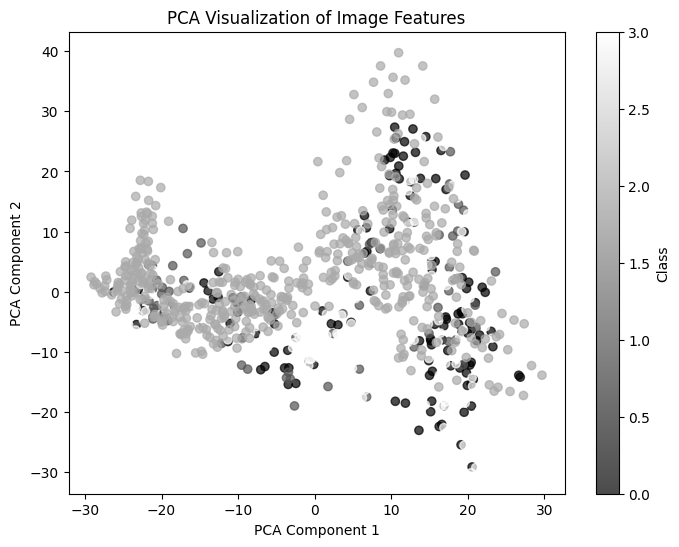

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load pretrained ResNet model for feature extraction
model = models.resnet50(pretrained=True)
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Dataset/MRI Images'

# Function to extract features from images
def extract_features():
    features = []
    labels = []

    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    try:
                        img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                        img = transform(img).unsqueeze(0)  # Add batch dimension
                        with torch.no_grad():
                            feature = model(img)
                        features.append(feature.numpy().flatten())
                        labels.append(class_name)
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")

    return np.array(features), np.array(labels)

# Extract features and labels
features, labels = extract_features()

# Debugging: Check the shapes and first few entries
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")
print("First few feature vectors:", features[:5])
print("First few labels:", labels[:5])

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Encode labels to numeric values
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
features_pca = pca.fit_transform(features)

# Debugging: Check the shape of PCA results
print(f"PCA features shape: {features_pca.shape}")

# Plot PCA results
plt.figure(figsize=(8,6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=numeric_labels, cmap='gray', alpha=0.7)
plt.colorbar(scatter, label='Class')
plt.title('PCA Visualization of Image Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
